
* 회귀직선의 방정식 (OLS) : y = 0.1008 * x +  0.2967


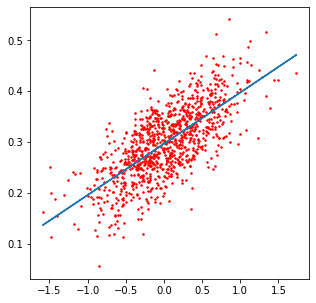


시험 데이터 전체 오류 (R2-score) = 0.5032
R-square = 0.5032


In [1]:
# 1차원 데이터로 Linear Regression 기능을 연습한다.
# ------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 샘플 데이터 1,000개를 생성한다
# y = ax + b + e
def createData(a, b, n):
   resultX = []
   resultY = []
   for i in range(n):
       x = np.random.normal(0.0, 0.5)
       y = a * x + b + np.random.normal(0.0, 0.05)
       resultX.append(x)
       resultY.append(y)
       
   return np.array(resultX).reshape(-1,1), np.array(resultY).reshape(-1,1)

# Train 데이터 세트와 Test 데이터 세트를 구성한다
X, Y = createData(0.1, 0.3, 1000) # y = 0.1x + 0.3 + e

# Logistic Regression으로 Train 데이터 세트를 학습한다.
model = LinearRegression()
model.fit(X, Y)

# 결과를 확인한다
a = model.coef_[0][0]
b = model.intercept_[0]
print("\n* 회귀직선의 방정식 (OLS) : y = %.4f * x +  %.4f" % (a, b))
yHat =  model.predict(X)

fig = plt.figure(figsize=(5, 5))
plt.plot(X, Y, 'ro', markersize=1.5)
plt.plot(X, yHat)
plt.show()

# 시험 데이터 전체의 오류를 R-square로 표시한다.
print('\n시험 데이터 전체 오류 (R2-score) = %.4f' % model.score(X, Y))

# R-square를 manual로 계산하고, model.score() 결과와 비교한다.
# SSE : explained sum of square
# SSR : residual sum of square (not explained)
# SST : total sum of square
# R-square : SSE / SST or 1 - (SSR / SST)
ssr = np.sum(np.square(yHat - Y))
sst = np.sum(np.square(Y - Y.mean()))
R2 = 1 - ssr / sst
print('R-square = %.4f' % R2)

